In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from clawpack import pyclaw
from clawpack import riemann

import logging
logger = logging.getLogger('pyclaw')
logger.setLevel(logging.DEBUG)



# Boundary condition that is specifying the continuous flow of air coming into the duct
def incoming_flow(state, dim, t, qbc, auxbc, num_ghost):
    gamma = 1.4
    R = 287.
    
    # Mach Number
    M = 0.5  
    
    # Pressure (Pascals)
    P = 101325.
    
    # Temperature (Kelvin)
    T = 300.  
    
    # Density (kg/m^3)
    rho = P/(R*T)    
    
    # x-component of velocity (m/s)
    u = M * np.sqrt(gamma*R*T) * np.cos(np.radians(0))  
    
    # y-component of velocity (m/s)
    v = M * np.sqrt(gamma*R*T) * np.sin(np.radians(0))  

    for i in range(num_ghost):
        qbc[0,i,...] = rho
        qbc[1,i,...] = rho*u
        qbc[2,i,...] = rho*v
        qbc[3,i,...] = P/(gamma-1.) + 0.5*rho*(u**2 + v**2)
        #qbc[3,i,...] =718.*T*rho + 0.5*rho*(u**2 + v**2)
        
# initial conditions. Assuming flow is initially stationary in the duct. The stagnation properties of the incoming flow are used to
# compute the initial conditions since air is stationary in the duct
def qinit(state):
    
    gamma = 1.4
    R = 287.
    # Incoming Flow Properties
    
    # Mach Number
    M = 0.5 
    
    # Pressure (Pascals)
    P = 101325.       
    
    # Temperature (Kelvin)
    T = 300.  
    
    # Density (kg/m^3)
    rho = P/(R*T)  
    

    # Stagnation properties
    
    # Computation of stagnation temperature based in the incoming flow properties T and M
    T0 = T*(1. + ((gamma-1.)/2.)*M**2)   
    
    # Computation of stagnation pressure based in the incoming flow properties P and M
    P0 = P*(1. + ((gamma-1.)/2.)*M**2)**(gamma/(gamma-1.))   
    
    # Computation of stagnation density based in the incoming flow properties rho and M
    rho0 = rho*(1. + ((gamma-1.)/2.)*M**2)**(1./(gamma-1.))
    
    # Stagnation conditions mean that air is stationary therefore the velocity components are zero
    u0 = 0.
    v0 = 0.
    
    state.q[0,...] = rho0 
    state.q[1,...] = rho0*u0
    state.q[2,...] = rho0*v0
    state.q[3,...] = P0/(gamma-1.) + 0.5*rho0*(u0**2 + v0**2)
    #state.q[3,...] =718.*T0*rho0 + 0.5*rho0*(u0**2 + v0**2)

    
# Creating the computational domain
nx = 200
ny = 50
x = pyclaw.Dimension(0, float(nx), nx, name='x')
y = pyclaw.Dimension(0, float(ny), ny, name='y')
domain = pyclaw.Domain([x, y])

# Selecting the solver 
solver = pyclaw.ClawSolver2D(riemann.euler_4wave_2D)

# Assigning the number of ghost sells in this solver to the grid 
domain.grid.num_ghost = solver.num_ghost

# Plotting the physical domain
#X, Y = domain.grid.c_centers
#plt.scatter(X, Y, s = 15)
#plt.axis('equal')


# Applying the boundary conditions to the domain. 
# The top and bottom boundary conditions are walls
# The left boundary condition is the incoming flow function
# The exit conditions are extrapolated from internal domain
solver.user_bc_lower = incoming_flow
solver.bc_lower[0] = pyclaw.BC.custom 
solver.bc_upper[0] = pyclaw.BC.extrap
solver.bc_lower[1] = pyclaw.BC.wall
solver.bc_upper[1] = pyclaw.BC.wall

# Initiating the state
state = pyclaw.State(domain, solver.num_eqn)
state.problem_data['gamma'] = 1.4

# Initiating the initial conditions 
qinit(state)


# Initiating the controller and the time steps
claw = pyclaw.Controller()
#claw.cfl_desired = 0.9
#claw.cfl_max = 1.0

#claw.dt_variable = True
#claw.dt_initial = 1e-10
claw.tfinal = 0.25
claw.num_output_times = 10


claw.keep_copy = True
claw.output_format = None

claw.solution = pyclaw.Solution(state, domain)
claw.solver = solver

claw.run()


2018-11-14 14:41:18,329 INFO CLAW: Solution 0 computed for time t=0.000000
2018-11-14 14:41:18,396 INFO CLAW: Solution 1 computed for time t=0.025000
2018-11-14 14:41:18,456 INFO CLAW: Solution 2 computed for time t=0.050000
2018-11-14 14:41:18,517 INFO CLAW: Solution 3 computed for time t=0.075000
2018-11-14 14:41:18,579 INFO CLAW: Solution 4 computed for time t=0.100000
2018-11-14 14:41:18,651 INFO CLAW: Solution 5 computed for time t=0.125000
2018-11-14 14:41:18,721 INFO CLAW: Solution 6 computed for time t=0.150000
2018-11-14 14:41:18,790 INFO CLAW: Solution 7 computed for time t=0.175000
2018-11-14 14:41:18,855 INFO CLAW: Solution 8 computed for time t=0.200000
2018-11-14 14:41:18,921 INFO CLAW: Solution 9 computed for time t=0.225000
2018-11-14 14:41:18,984 INFO CLAW: Solution 10 computed for time t=0.250000


{'cflmax': 0.9689681170893034,
 'dtmax': 0.0020551807535508764,
 'dtmin': 0.0018916093498738125,
 'numsteps': 140}

[[0.17675678 0.17675678 0.17675678 ... 0.17675678 0.17675678 0.17675678]
 [0.17675658 0.17675658 0.17675658 ... 0.17675658 0.17675658 0.17675658]
 [0.17675653 0.17675653 0.17675653 ... 0.17675653 0.17675653 0.17675653]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


(0.5, 199.5, 0.5, 49.5)

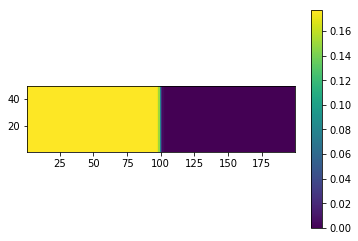

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
gamma = 1.4
R = 287.

frame = claw.frames[-1]
rho = frame.q[0,:,:]
u = frame.q[1,:,:]/frame.q[0,:,:]
v = frame.q[2,:,:]/frame.q[0,:,:]
p = (gamma-1.)*(frame.q[3,:,:] - 0.5*rho*(u**2 + v**2))
T = p/(rho*R)
M = np.sqrt(u**2+v**2)/np.sqrt(gamma*R*T)
print(M)
x, y = frame.state.grid.c_centers

plt.pcolormesh(x, y, M)
#plt.scatter(x, y, c=M)
plt.colorbar()
plt.axis('image')
#plt.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from clawpack import pyclaw
from clawpack import riemann

import logging
logger = logging.getLogger('pyclaw')
logger.setLevel(logging.DEBUG)

# This function specifies the mapping to the physical domain
def mapc2p_(xc, yc):
    
    p_centers = []
    
    xp = xc
    yp = yc
    
    p_centers.append(xp)
    p_centers.append(yp)
    
    return p_centers 


# auxilliary array
def setaux(state):

    # Physical Domain Nodes
    xp_nodes, yp_nodes = state.grid.p_nodes
    
    # Computation of the number of cell in the domain in the x and y directions
    nx, ny = np.shape(state.grid.p_centers[0])

    # Computation of the arrays consisting of the outward normal vectors on the left and the bottom of the cell
    
    # (Left Edge)
    n_LeftEdge = np.zeros((2, nx, ny))
    
    # Rotation Matrix: Rorates slope vector through an angle to obtain the outward pointing normal vector
    def Rotation_Matrix(angle):
        R = np.zeros((2,2))
        R[0,0] = np.cos(angle)
        R[0,1] = -np.sin(angle)
        R[1,0] = np.sin(angle)
        R[1,1] = np.cos(angle)
        return R
    
    alpha = np.deg2rad(-90)
    Rot = Rotation_Matrix(alpha)

    for i in range(0, nx):
        for j in range(0, ny):
            # Computation of the tangent/slope vector
            u = np.zeros((2,1))
            u[0] = xp_nodes[i, j+1] -  xp_nodes[i, j]
            u[1] = yp_nodes[i, j+1] -  yp_nodes[i, j]
            # Computation of the normal vector
            n = np.matmul(Rot, u)
            # Non dimensionalizing the normal vector
            n_unit = n/np.sqrt(n[0]**2 + n[1]**2)
            n_LeftEdge[0, i, j] = n_unit[0]
            n_LeftEdge[1, i, j] = n_unit[1]
    
    # (Bottom Edge)
    n_BottomEdge = np.zeros((2, nx, ny))
    # Rotation Matrix: Rorates slope vector through alpha to obtain the outward pointing normal vector
    beta = np.deg2rad(90)
    Rot = Rotation_Matrix(beta)
    for i in range(0, nx):
        for j in range(0, ny):
            # Computation of the tangent vector
            u = np.zeros((2,1))
            u[0] = xp_nodes[i+1, j] -  xp_nodes[i ,j]
            u[1] = yp_nodes[i+1 , j] -  yp_nodes[i ,j]
            # Computation of the normal vector
            n = np.matmul(Rot, u)
            # Non dimensionalizing the normal vector
            n_unit = n/np.sqrt(n[0]**2 + n[1]**2)
            n_BottomEdge[0, i, j] = n_unit[0]
            n_BottomEdge[1, i, j] = n_unit[1]
            
    # Computation of the Length Ratios at the left and bottom of the cells as well as cappacity (area ratio)
    gamma_LeftEdge = np.zeros((nx, ny))
    gamma_BottomEdge = np.zeros((nx, ny))
    capa = np.zeros((nx, ny))
    
    # delta in the computational domain
    dx, dy = state.grid.delta
    
    for i in range(0, nx):
        for j in range(0, ny):
            # Computation of the length of the cell on the left edge of the cell
            hp = np.sqrt((yp_nodes[i, j+1]- yp_nodes[i, j])**2 + (xp_nodes[i, j+1]- xp_nodes[i, j])**2 )
            # Computation of the length ratio of the cell on the left edge of the cell
            gamma_LeftEdge[i, j] = hp/dy
            # Computation of the length of the cell on the bottom edge of the cell
            wp = np.sqrt((yp_nodes[i+1, j]- yp_nodes[i, j])**2 + (xp_nodes[i+1, j]- xp_nodes[i, j])**2 )
            # Computation of the length ratio of the cell on the bottom edge of the cell
            gamma_BottomEdge[i, j] = wp/dx
            # Computation of the area of the cell in the physical domain (i.e. computation of the area on a irregular quadrilateral)
            a = np.sqrt((yp_nodes[i+1, j+1]- yp_nodes[i, j+1])**2 + (xp_nodes[i+1, j+1]- xp_nodes[i, j+1])**2)
            b = np.sqrt((yp_nodes[i+1, j+1]- yp_nodes[i+1, j])**2 + (xp_nodes[i+1, j+1]- xp_nodes[i+1, j])**2)
            c = np.sqrt((yp_nodes[i+1, j]- yp_nodes[i, j])**2 + (xp_nodes[i+1, j]- xp_nodes[i, j])**2)
            d = np.sqrt((yp_nodes[i, j+1]- yp_nodes[i, j])**2 + (xp_nodes[i, j+1]- xp_nodes[i, j])**2)
            s = 1./2.*(a+b+c+d)
            A_p = np.sqrt((s-a)*(s-b)*(s-c)*(s-d))
            # Computation of the capacity
            capa[i, j] = (A_p)/(dx*dy)

    # Populating the auxillary matrix with the computed values as per pg 532 of 'Finite Volume Methods for Hyperbolic Problems'
    aux = np.zeros((7, nx, ny))
    aux[0, :, :] = n_LeftEdge[0, :, :]
    aux[1, :, :] = n_LeftEdge[1, :, :]
    aux[2, :, :] = gamma_LeftEdge[:, :]
    aux[3, :, :] = n_BottomEdge[0, :, :]
    aux[4, :, :] = n_BottomEdge[1, :, :]
    aux[5, :, :] = gamma_BottomEdge[:, :]
    aux[6, :, :] = capa[:, :]
    
    return aux


# Boundary condition that is specifying the continuous flow of air coming into the duct
def incoming_flow(state, dim, t, qbc, auxbc, num_ghost):
    gamma = 1.4
    R = 287.
    
    # Mach Number
    M = 0.5  
    
    # Pressure (Pascals)
    P = 101325.
    
    # Temperature (Kelvin)
    T = 300.  
    
    # Density (kg/m^3)
    rho = P/(R*T)    
    
    # x-component of velocity (m/s)
    u = M * np.sqrt(gamma*R*T) * np.cos(np.radians(0))  
    
    # y-component of velocity (m/s)
    v = M * np.sqrt(gamma*R*T) * np.sin(np.radians(0))  

    for i in range(num_ghost):
        qbc[0,i,...] = rho
        qbc[1,i,...] = rho*u
        qbc[2,i,...] = rho*v
        qbc[3,i,...] = P/(gamma-1.) + 0.5*rho*(u**2 + v**2)
        
        
# initial conditions. Assuming flow is initially stationary in the duct. The stagnation properties of the incoming flow are used to
# compute the initial conditions since air is stationary in the duct
def qinit(state):
    
    gamma = 1.4
    R = 287.
    
    # Incoming Flow Properties
    
    # Mach Number
    M = 0.5 
    
    # Pressure (Pascals)
    P = 101325.       
    
    # Temperature (Kelvin)
    T = 300.  
    
    # Density (kg/m^3)
    rho = P/(R*T)  
    

    # Stagnation properties
    
    # Computation of stagnation temperature based in the incoming flow properties T and M
    T0 = T*(1. + ((gamma-1.)/2.)*M**2)   
    
    # Computation of stagnation pressure based in the incoming flow properties P and M
    P0 = P*(1. + ((gamma-1.)/2.)*M**2)**(gamma/(gamma-1.))   
    
    # Computation of stagnation density based in the incoming flow properties rho and M
    rho0 = rho*(1. + ((gamma-1.)/2.)*M**2)**(1./(gamma-1.))
    
    # Stagnation conditions mean that air is stationary therefore the velocity components are zero
    u0 = 0.
    v0 = 0.
    
    state.q[0,...] = rho0 
    state.q[1,...] = rho0*u0
    state.q[2,...] = rho0*v0
    state.q[3,...] = P0/(gamma-1.) + 0.5*rho0*(u0**2 + v0**2)

    
# Creating the computational domain
nx = 200
ny = 50
x = pyclaw.Dimension(0, float(nx), nx, name='x')
y = pyclaw.Dimension(0, float(ny), ny, name='y')
domain = pyclaw.Domain([x, y])
# Apply mapping
domain.grid.mapc2p = mapc2p_

# Selecting the solver 
solver = pyclaw.ClawSolver2D(riemann.euler_mapgrid_2D)

# Assigning the number of ghost sells in this solver to the grid 
domain.grid.num_ghost = solver.num_ghost

# Plotting the physical domain
#X, Y = domain.grid.p_centers
#plt.scatter(X, Y, s = 15)
#plt.axis('equal')

# Applying the boundary conditions to the domain. 
# The top and bottom boundary conditions are walls
# The left boundary condition is the incoming flow function
# The exit conditions are extrapolated from internal domain
solver.user_bc_lower = incoming_flow
solver.bc_lower[0] = pyclaw.BC.custom 
solver.bc_upper[0] = pyclaw.BC.extrap
solver.bc_lower[1] = pyclaw.BC.wall
solver.bc_upper[1] = pyclaw.BC.wall

# Applying auxillary boundary conditions
solver.aux_bc_lower[0] = pyclaw.BC.extrap
solver.aux_bc_upper[0] = pyclaw.BC.extrap
solver.aux_bc_lower[1] = pyclaw.BC.wall
solver.aux_bc_upper[1] = pyclaw.BC.wall

# The number of variables in the auxilliary array
num_aux = 7
# Initiating the state
state = pyclaw.State(domain, solver.num_eqn, num_aux)
state.problem_data['gamma'] = 1.4
# Assignign the auxilliary array
state.aux[:,:,:] = setaux(state)
#print(setaux(state)[0,:,:])
#print(setaux(state)[1,:,:])
#print(setaux(state)[2,:,:])
#print(setaux(state)[3,:,:])
#print(setaux(state)[4,:,:])
#print(setaux(state)[5,:,:])
#print(setaux(state)[6,:,:])

# Initiating the initial conditions 
qinit(state)

# Initiating the controller and the time steps
claw = pyclaw.Controller()
#claw.cfl_desired = 0.4
#claw.cfl_max = 5

#claw.dt_variable = True
#claw.dt_initial = 1e-10
claw.tfinal = 0.2
claw.num_output_times = 10

claw.keep_copy = True
claw.output_format = None

claw.solution = pyclaw.Solution(state, domain)
claw.solver = solver

claw.run()

2018-11-14 14:54:40,527 INFO CLAW: Solution 0 computed for time t=0.000000
2018-11-14 14:54:40,607 INFO CLAW: Solution 1 computed for time t=0.020000
2018-11-14 14:54:40,678 INFO CLAW: Solution 2 computed for time t=0.040000
2018-11-14 14:54:40,748 INFO CLAW: Solution 3 computed for time t=0.060000
2018-11-14 14:54:40,818 INFO CLAW: Solution 4 computed for time t=0.080000
2018-11-14 14:54:40,893 INFO CLAW: Solution 5 computed for time t=0.100000
2018-11-14 14:54:40,970 INFO CLAW: Solution 6 computed for time t=0.120000
2018-11-14 14:54:41,048 INFO CLAW: Solution 7 computed for time t=0.140000
2018-11-14 14:54:41,127 INFO CLAW: Solution 8 computed for time t=0.160000
2018-11-14 14:54:41,203 INFO CLAW: Solution 9 computed for time t=0.180000
2018-11-14 14:54:41,280 INFO CLAW: Solution 10 computed for time t=0.200000


{'cflmax': 0.9689681170893034,
 'dtmax': 0.002055180753550877,
 'dtmin': 0.0018916093498738123,
 'numsteps': 110}

[[0.17675624 0.17675593 0.17675749 ... 0.17675612 0.17675612 0.17675612]
 [0.17675499 0.17675601 0.17675728 ... 0.1767554  0.1767554  0.1767554 ]
 [0.17675436 0.17675844 0.17675396 ... 0.17675526 0.17675526 0.17675526]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


(-9.459856630824374, 209.4598566308244, -1.965176600441501, 51.965176600441495)

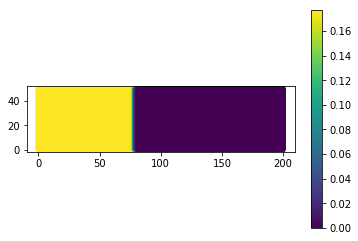

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
gamma = 1.4
R = 287.

frame = claw.frames[-1]
rho = frame.q[0,:,:]
u = frame.q[1,:,:]/frame.q[0,:,:]
v = frame.q[2,:,:]/frame.q[0,:,:]
p = (gamma-1.)*(frame.q[3,:,:] - 0.5*rho*(u**2 + v**2))
T = p/(rho*R)
M = np.sqrt(u**2+v**2)/np.sqrt(gamma*R*T)
print(M)
x, y = frame.state.grid.c_centers

#plt.pcolormesh(x, y, M)
plt.scatter(x, y, c=M)
plt.colorbar()
plt.axis('image')
#plt.show()